In [10]:
import numpy as np
import matplotlib.pyplot as plt
nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)

## How many people live on earth?

In [11]:
population_earth = np.sum(nations[:,6])
print(int(population_earth), "people live on earth")

6482276104 people live on earth


## What is the average life expectancy of the world population?

In [12]:
life_expectancy = nations[:,4]
average_life_expectancy = np.divide(np.sum(life_expectancy),len(life_expectancy))
print(np.round(average_life_expectancy,2),"(rounded)")

71.69 (rounded)


## Do people who can read live longer?

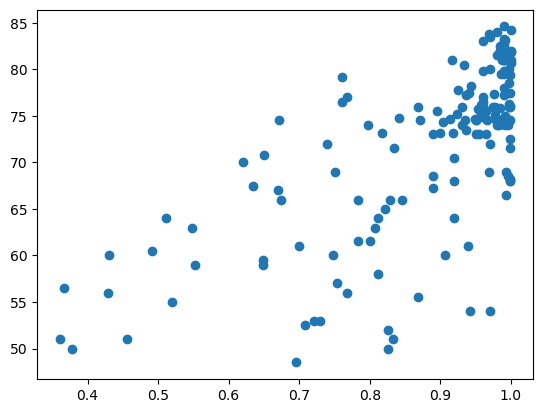

In [13]:
plt.scatter(nations[:,5], nations[:,4])

## Average Life Expectancy by countries GDP

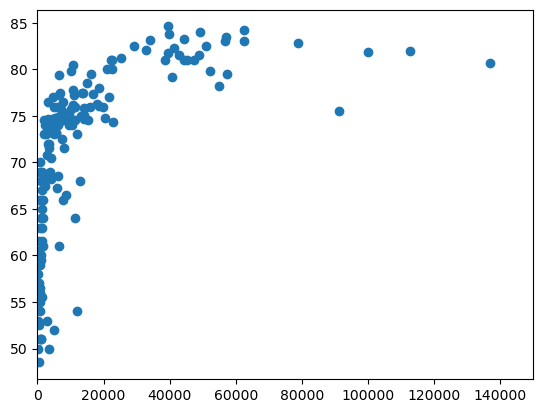

In [14]:
gdpC = np.array(np.multiply(np.divide(nations[:,3],nations[:,6]),1000000))
plt.scatter(gdpC, nations[:,4])
plt.xlim(0, 150000)
plt.show()

## Approximate Course

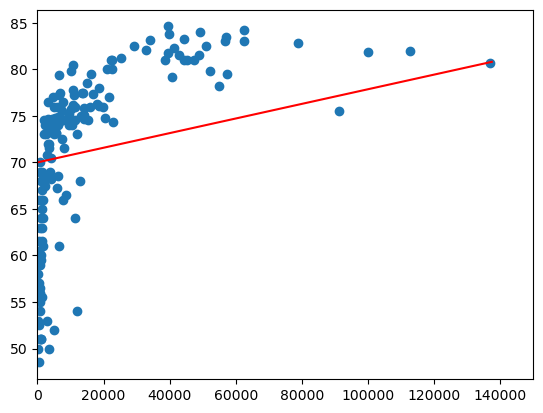

In [15]:
plt.scatter(gdpC, nations[:,4])
plt.xlim(0, 150000)

#line
startpoint = np.array([0, 70])
endpoint = np.array([137400,80.8])


line = np.array([startpoint,endpoint])
plt.plot(line[:,0],line[:,1],'r-')
plt.show()

## Linear Equation

In [16]:
def linearEqyualtion (x,sP,eP):
    dx = np.subtract(eP[0],sP[0])
    dy = np.subtract(eP[1],sP[1])
    m = np.divide(dy,dx)
    n = np.subtract(sP[1],np.multiply(m,sP[0]))

    return np.add(np.multiply(m,x),n)


## RMSE

In [17]:
rsmeN = 0
errorAdd = 0

for n in nations:
    gdpC = np.multiply(np.divide(n[3],n[6]),1000000)

    lifespan_expected = linearEqyualtion(gdpC,startpoint,endpoint)
    lifespan = n[4]

    error = np.subtract(lifespan_expected,lifespan)
    errorPow = np.power(error,2)
    errorAdd += errorPow

errorDiv = np.divide(errorAdd,len(nations))
rsmeN = np.sqrt(errorDiv)
print(rsmeN)

8.171436987316907


## Optimised
- First Values: [0, 70] & [140000,80] RSME= 8.245150730622186
- Second Values [0, 70] & [135000,81] RMSE= 8.142984118114661 not enough X
- Third Values [0, 71] & [137000,81] RMSE= 8.222134053649755
- Fourth Values [0, 70] & [137400,80.5] RMSE= 8.193449709253219 BEST
- Fifth Values [0, 70] & [137400,80.8] RMSE= 8.160413687746379 BEST VALUES